<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto5/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Marcius D. Moraes](https://github.com/marciusdm)*  

---

# Churn Prediction
*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.
<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.
*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.


##1. O contexto do projeto
Como já vimos ma introdução, o custo para manter um cliente é menor do que o custo de se perder um cliente. De fato, o custo para se adquirir um cliente novo pode até ser [25 vezes maior](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) do que manter um cliente antigo. Não é difícil entender o porquê disto, já que não há necessidade de se ir atrás e encontrar um novo cliente. Basta manter o cliente atual feliz.
Existem mesmo até métricas para se avaliar o total de clientes que cancelaram e a receita perdida com estes cancelamentos.
As principais medidas são:
*   *Churn rate*: total de clientes que cancelaram o serviço no mês / clientes no início do mês x 100
*   Churn de receita ou MRR Churn: indica o quanto de receita é perdido com os cancelamentos. MRR é uma sigla para *Monthly Recurring Revenue* (receita recorrente mensal). O Churn de receita é igual à soma dos MRRs dos clientes perdidos.
O Churn de receita também pode ser expresso em termos relativos, bastanndo dividí-lo pelo receita total do mês.

Segue abaixo um resumo das métricas de churn de clientes:

$$
\text{Churn rate} = \frac{\text{total de cancelamentos}}{\text{total de clientes ativos no último mês}} * 100 \\[2em]
\text{MRR Churn} = \Sigma (\text{MRR dos clientes cancelados)}\\[2em]
\text{MRR Churn %} = \frac{\text{MRR Churn}}{\text{MRR último mês}}*100
$$


O interesssante é que o churn de receita pode ser negativo. Ou seja, mesmo se perdendo clientes a empresa aumenta a receita. Para isto acontecer basta aumentar as vendas para os clientes existentes  e que este ganho adicional supere as perdas com os cancelamentos. No entanto, isto é um caso bastante particular, e no geral, a perda de cliente leva à perda de receita. Por isso mesmo, é importante que as empresas invistam em ações para tentar reter seus clientes.

Para atingir este objetivo, as empresas podem lançar mão de diversas  estratégias, que são parte daquilo que é chamado de [Customer Success](https://resultadosdigitais.com.br/marketing/o-que-e-customer-success/) (sucesso do cliente). Algumas providências que podem ser tomadas para manter os cliente são:
* Investir em programas de fidelidade;
* Criar canais para obter feedback do cliente;
* Aperfeiçoar o atendimento ao cliente;
* Melhorar os processos de pós-venda;
* Identificar os clientes que estão mais propensos a cancelar.

Nosso foco, a partir de agora é a última tarefa acima, ou seja, tentar prever os clientes que irão cancelar seus contratos. Para isso, neste projeto será proposta uma solução de aprendizado de máquina (*machine learning), em que seráo testados vários modelos com o intuido de descobrir qual se sai melhor.

## 2. Aquisição dos Dados

Os dados que serão utilizados para treinar os modelos de ML advêm da plataforma [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset), que por sua vez, obteve estes dados na plataforma de ensino da IBM Developer, porém a IBM não mais mantém estes dados.
Trata-se de um conjunto de dados de clientes de uma companhia de telecomunicações fictícia, que contém 7043 registros, dos quais alguns deles são de clientes que cancelaram os serviços com a empresa.

In [1]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier




In [2]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
print("Dimensões do conjunto de dados: ", df.shape)


Dimensões do conjunto de dados:  (7043, 21)


## 3. Análise exploratória dos dados
Vamos agora verificar a estrutura dos dados que importamos para o nosso dataset.



### 3.1 Exibindo as primeiras entradas do dataset
Vamos primeiramente verificar as 5 primeiras entradas:


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3.2 Descobrindo os tipos de variáveis
O comando abaixo serve para mostrar os tipos de dados de cada uma das colunas do conjunto de dados:

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

A coluna `TotalCharges` estranhamente não é numérica. Ao examinar o arquivo CSV foi constatado que há registros em que esta coluna está em branco. Isto ocorre com novos clientes, que ainda não pagaram nenhuma mnesalidade. Então vamos efetuar uma transformação para converter valores vazios em zeros:

In [3]:
df['TotalCharges']= df['TotalCharges'].apply(lambda x: 0.0 if  x == ' ' else float(x))
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Agora sim, o campo `TotalCharges` tornou-se nunérico
Há diversas variáveis categóricas neste dataset, por isso mesmo, teremos de executar um pré-processamento antes de alimentar nossos modelos de machine learning.

### 3.3 Dicionário de dados
`CustomerID`: ID do cliente;  
`gender`: se o cliente é homem ou mulher;  
`SeniorCitizen`: Se o cliente é idoso ou não (1, 0);  
`Partner`: Se o cliente tem um parceiro ou não (Yes, No);  
`Dependents`: Se o cliente tem dependentes ou não (Yes, No);  
`tenure`: Número de meses que o cliente permaneceu na empresa;  
`PhoneService`: Se o cliente possui atendimento telefônico ou não (Yes, No);  
`MultipleLines`: Se o cliente tem várias linhas ou não (Yes, No, No phone service);  
`InternetService`: Provedor de serviços de Internet do cliente (DSL, Fibra ótica, Não);  
`OnlineSecurity`: Se o cliente tem segurança online ou não (Yes, No, No internet service);  
`OnlineBackup`: Se o cliente tem backup online ou não (Yes, No, No internet service);  
`DeviceProtection`: Se o cliente tem proteção de dispositivo ou não (Yes, No, No internet service);  
`TechSupport`: Se o cliente tem suporte técnico ou não (Yes, No, No internet service);  
`StreamingTV`: Se o cliente tem streaming de TV ou não (Yes, No, No internet service);  
`StreamingMovies`: Se o cliente tem streaming de filmes ou não (Yes, No, No internet service);  
`Contract`: O prazo do contrato do cliente (Month-to-month, One year, Two year);  
`PaperlessBilling`: Se o cliente tem faturamento sem papel ou não (Yes, No);  
`PaymentMethod`: O método de pagamento do cliente (Electronic check, Mailed check, Bank tFransfer (automatic), Credit card (automatic));  
`MonthlyCharges`: O valor cobrado mensalmente do cliente;  
`TotalCharges`: O valor total cobrado do cliente;  
`Churn`: Se o cliente desistiu ou não (Yes or No).



### 3.4 Resumo estatístico dos dados

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observa-se pelos dados acima que cerca de 16% dos clientes têm 65 ou mais, além disso. a média de meses em que os clientes estão na empresa é de cerca de 32 meses e a mensalidade média é de 64,75 dólares aproximadamente e não há outliers nestas colunas. Vamos plotar um diagrama de caixas para as colunas numéricas


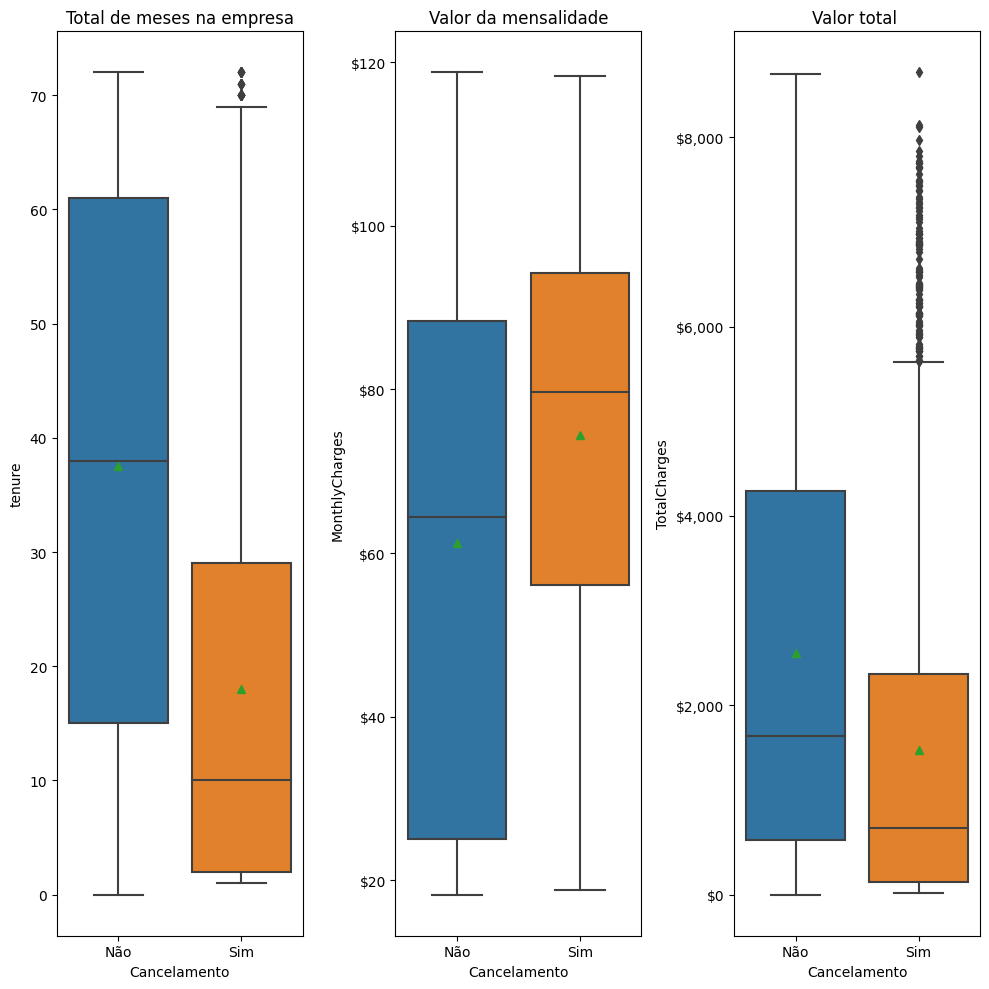

In [ ]:
fig, (ax1,ax2,ax3 ) = plt.subplots( nrows=1, ncols=3 , sharex=True,figsize=(10,10)) #figsize=(12,10)


sns.boxplot(x=df.Churn, y=df.tenure, showmeans=True, ax=ax1)
ax1.set_title("Total de meses na empresa")
ax1.set_xlabel("Cancelamento")

sns.boxplot(x=df.Churn, y=df.MonthlyCharges, showmeans=True, ax=ax2)
#inserir o símbolo $ nos valores dos eixo y
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

ax2.set_title("Valor da mensalidade")
ax2.set_xlabel("Cancelamento")

sns.boxplot(x=df.Churn, y=df.TotalCharges, showmeans=True, ax=ax3)
#inserir o símbolo $ nos valores dos eixo y
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

ax3.set_title("Valor total ")
ax3.set_xlabel("Cancelamento")

plt.xticks([0,1], ['Não', 'Sim'])

plt.tight_layout()

Há uma diferença entre o perfil dos usuários que cancelaram os serviços com a a empresa e os que não cancelaram. Os que cancelaram, tem em média, as mensalidades mais caras e menos tempo de empresa, consequentemente, os valores totais pagos por estes clietes (gráfico mais à direita) são menores.
### 3.5 Verificando se existem dados ausentes

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ou seja, não existe dados ausentes
### 3.6. Verificando o balanceamento dos dados
Vamos agora verificar proporção de clientes que cancelaram os serviços com a Telco e os que permaneceram

No     5174
Yes    1869
Name: Churn, dtype: int64

Cancelamentos representam 26.5370% do dataset.



[]

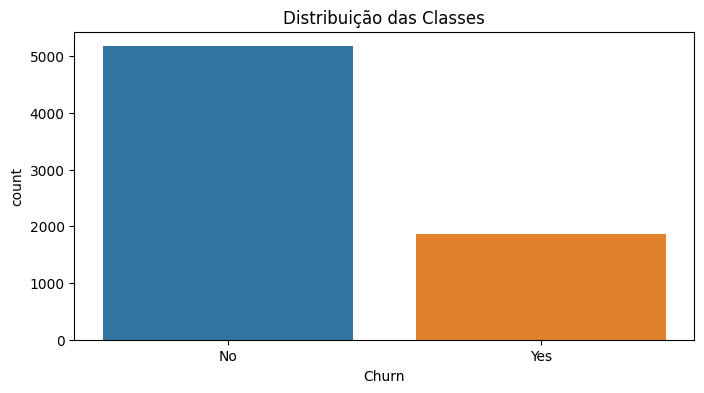

In [ ]:
# plotar gráfico de barras para as Classes
# ver o balanceamento das classes
print(df.Churn.value_counts())
print("\nCancelamentos representam {:.4f}% do dataset.\n".format((df[df.Churn == 'Yes'].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Churn', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Os cancelamentos aqui representam 26,5% do total de dados. [Na vida real](https://resultadosdigitais.com.br/marketing/o-que-e-churn/), a taxa de cancelamento anual costuma ficar entre 5 e 7% por ano. Como tratam-se de dados fictícios, o número de cancelamento provavelmente foi inflado para fins didáticos.

### 3.7 Um panorama geral dos clientes da companhia Telco
Vamos agora mostrar um perfil dos clientes da Telco, quanto ao sexo, faixa etária e aos serviços contratados. Primeiramente. faremos um panorama geral dos clientes, e a seguir traçar um perfil dos que saíram da empresa e os que continuaram, com o intuito de verificar quem é mais propenso a cancelar.

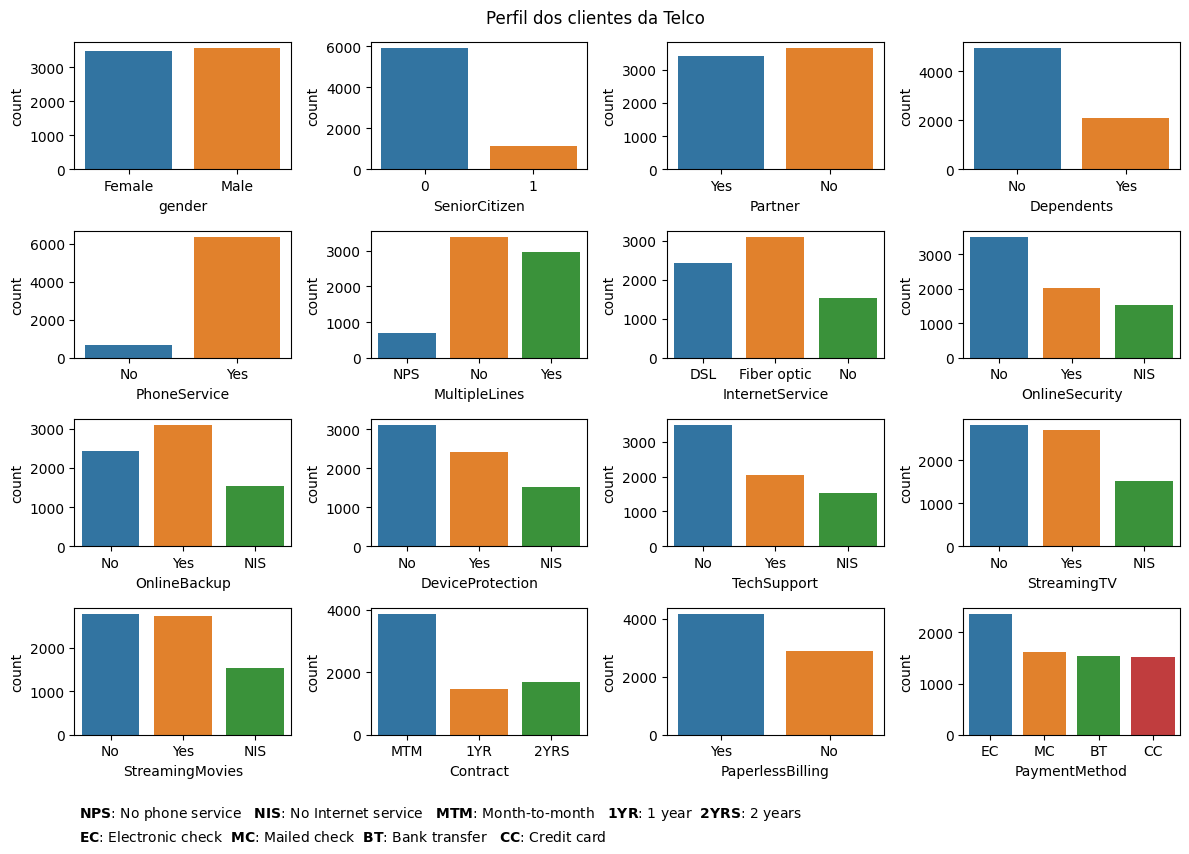

In [ ]:
#panorama geral dos clientes
fig, ax = plt.subplots(figsize=(12,8), ncols=4, nrows=4)
fig.suptitle("Perfil dos clientes da Telco")
sns.countplot(x='gender', data=df, ax=ax[0,0])
sns.countplot(x='SeniorCitizen', data=df, ax=ax[0,1])
sns.countplot(x='Partner', data=df, ax=ax[0,2])
sns.countplot(x='Dependents', data=df, ax=ax[0,3])
sns.countplot(x='PhoneService', data=df, ax=ax[1,0])
sns.countplot(x='MultipleLines', data=df, ax=ax[1,1])
ax[1,1].set_xticks([0,1,2], ['NPS','No','Yes'])
sns.countplot(x='InternetService', data=df, ax=ax[1,2])
sns.countplot(x='OnlineSecurity', data=df, ax=ax[1,3])
ax[1,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='OnlineBackup', data=df, ax=ax[2,0])
ax[2,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='DeviceProtection', data=df, ax=ax[2,1])
ax[2,1].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='TechSupport', data=df, ax=ax[2,2])
ax[2,2].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingTV', data=df, ax=ax[2,3])
ax[2,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingMovies', data=df, ax=ax[3,0])
ax[3,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='Contract', data=df, ax=ax[3,1])
ax[3,1].set_xticks([0,1,2], ['MTM','1YR','2YRS'])
sns.countplot(x='PaperlessBilling', data=df, ax=ax[3,2])
sns.countplot(x='PaymentMethod', data=df, ax=ax[3,3])
ax[3,3].set_xticks([0,1,2,3], ['EC','MC','BT','CC'])
plt.figtext(0.07,-0.03,"$\\bf{NPS}$: No phone service   $\\bf{NIS}$: No Internet service   $\\bf{MTM}$: Month-to-month   $\\bf{1YR}$: 1 year  $\\bf{2YRS}$: 2 years")
plt.figtext(0.07, -0.06,"$\\bf{EC}$: Electronic check  $\\bf{MC}$: Mailed check  $\\bf{BT}$: Bank transfer   $\\bf{CC}$: Credit card")
plt.tight_layout()
plt.show()

Pelo que se vê acima a distribuição de clientes é bem equilibrada quanto ao sexo e quanto à existência de dependentes. Outro aspecto em que há um equilíbrio é quanto aos serviços de *streaming*.
Por outro lado, apenas uma minoria de clientes é idosa e possui dependentes. Quanto aos serviços, a maioria possui serviços de telefonia e de Internet. A forma de contrato mais comum é de mês a mês e a forma de pagamento mais utilizada é cheque eletrônico.  
Vamos agora analisar o perfil de quem está mais propenso a cancelar os serviços com a operadora

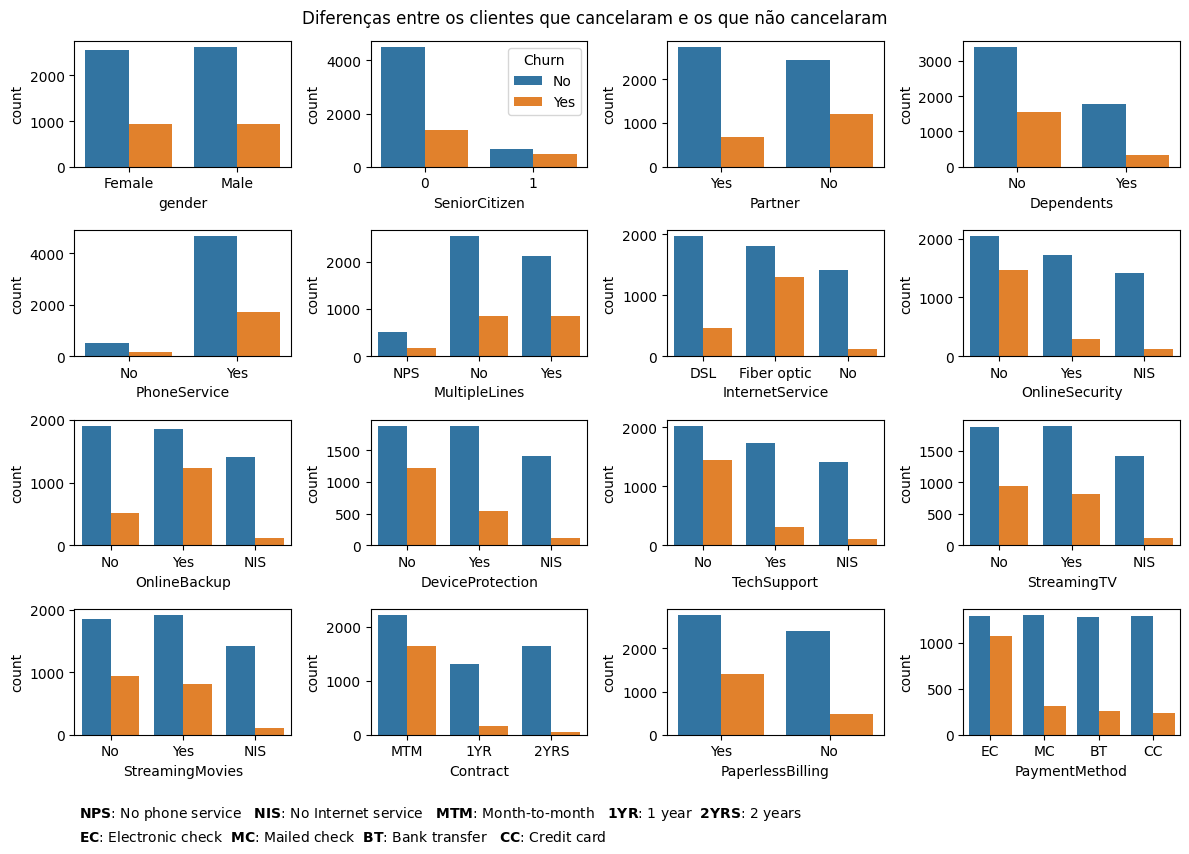

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), ncols=4, nrows=4)
fig.suptitle("Diferenças entre os clientes que cancelaram e os que não cancelaram")
sns.countplot(x='gender', data=df, hue="Churn", ax=ax[0,0])

sns.countplot(x='SeniorCitizen', data=df, hue="Churn", ax=ax[0,1])
sns.countplot(x='Partner', data=df, hue="Churn", ax=ax[0,2])
sns.countplot(x='Dependents', data=df, hue="Churn", ax=ax[0,3])
sns.countplot(x='PhoneService', data=df, hue="Churn", ax=ax[1,0])
sns.countplot(x='MultipleLines', data=df, hue="Churn", ax=ax[1,1])
ax[1,1].set_xticks([0,1,2], ['NPS','No','Yes'])
sns.countplot(x='InternetService', data=df, hue="Churn", ax=ax[1,2])
sns.countplot(x='OnlineSecurity', data=df, hue="Churn", ax=ax[1,3])
ax[1,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='OnlineBackup', data=df, hue="Churn", ax=ax[2,0])
ax[2,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='DeviceProtection', data=df, hue="Churn", ax=ax[2,1])
ax[2,1].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='TechSupport', data=df, hue="Churn", ax=ax[2,2])
ax[2,2].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingTV', data=df, hue="Churn", ax=ax[2,3])
ax[2,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingMovies', data=df, hue="Churn", ax=ax[3,0])
ax[3,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='Contract', data=df, hue="Churn", ax=ax[3,1])
ax[3,1].set_xticks([0,1,2], ['MTM','1YR','2YRS'])
sns.countplot(x='PaperlessBilling', data=df, hue="Churn", ax=ax[3,2])
sns.countplot(x='PaymentMethod', data=df, hue="Churn", ax=ax[3,3])
ax[3,3].set_xticks([0,1,2,3], ['EC','MC','BT','CC'])
for i in range(4):
  for j in range(4):
    if(i ==0 and j==1 ): continue
    ax[i,j].get_legend().set_visible(False)
#sns.move_legend(ax[3,1],'lower left',ncol=2, bbox_to_anchor=(0.75, -0.2),frameon=False)
plt.figtext(0.07,-0.03,"$\\bf{NPS}$: No phone service   $\\bf{NIS}$: No Internet service   $\\bf{MTM}$: Month-to-month   $\\bf{1YR}$: 1 year  $\\bf{2YRS}$: 2 years")
plt.figtext(0.07, -0.06,"$\\bf{EC}$: Electronic check  $\\bf{MC}$: Mailed check  $\\bf{BT}$: Bank transfer   $\\bf{CC}$: Credit card")
plt.tight_layout()
plt.show()

O perfil de cliente mais propenso a cancelar apresenta os seguintes traços:
* cliente mais idoso;
* possui serviço de Internet por fibra óptica;
* não possui serviço de suporte técnico, nem de proteção de dispositivo, mas possui serviço de backup;
* contrato na modalidade mês a mês;
* faz pagamento via cheque eletrônico.

Por outro lado, os que têm a menor possibilidade de cancelar, apresentam o seguinte perfil:
* possui cônjuge;
* possui dependentes;
* não tem serviço de Internet;
* possui contrato de 2 anos;
* recebe cobrança em papel;
* efetua pagamento via cartão de crédito.

## 4. A preparação dos dados


### 4.1. Transformando as colunas categóricas em numéricas
Primeiramente teremos de efetuar uma série de transformações nos dados com o intuito de obter um melhor desempenho dos modelos de *machine learning* a ser testados. Os procedimentos a serem feitos são os seguintes:
* Efetuar uma [padronização](https://acervolima.com/pre-processamento-de-dados-com-sklearn-usando-escalonador-standard-e-minmax/) de dados nas colunas numéricas;
* Para as variáveis categoricas que assumem apenas 2 valores (Yes e No), com exceção da variável alvo `Churn` será feita uma codificação do tipo [OrdinalEncoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c);
* Para as variáveis categórias que assumem mais de dois valores será feita uma codificação [OneHotEncoder](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/);
* Para colunas, cujos valores são 0 e 1, não será feito nenhum pré-processamento;
* Para a variável alvo `Churn` será feita a codificação do tipo [LabelEncoder](https://scikit-learn.org/stable/modules/preprocessing_targets.html#label-encoding), que funciona de maneira semelhante a `OrdinalEncoder`, exceto pelo fato de que ela trabalha apenas com uma coluna de cada vez e é apropriado para as colunas que são as variáveis alvo .

Para executar os procedimentos acima, com exceção do último, que será executado em separado, sserá utilizado o método `make_column_transformer` que permite agrupar vários comandos em uma única instrução.

In [4]:
#1ª etapa: remover a coluna customer_id
df.drop("customerID",axis=1,inplace=True)

#2ª etapa: transformar a coluna 'Churn' para numérica com possiveis valores usando 0 e 1
#O LabelEncoder não pode ser executado usando o método make_column_transfer
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

#3º etapa: efetuar o tramamento em todas as colunas, com exceção da coluna Churn
transform = make_column_transformer(
    (StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"]), #Aplicando StandardScaler nas colunas numéricas
    (OneHotEncoder(), ['gender','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                       'Contract','PaymentMethod','OnlineBackup']), #Codificação OneHotEncoder p/ colunas categóricas com mais de dois valores
    (OrdinalEncoder(),['Dependents','Partner','PhoneService','PaperlessBilling']) , #Codificação OrdinalEncoder p/ colunas com apenas dois valores possíveis.
    remainder="passthrough"
)
transformed = transform.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transform.get_feature_names_out())

transformed_df.head()

,standardscaler__tenure,standardscaler__MonthlyCharges,standardscaler__TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__PaymentMethod_Mailed check,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,ordinalencoder__Dependents,ordinalencoder__Partner,ordinalencoder__PhoneService,ordinalencoder__PaperlessBilling,remainder__SeniorCitizen,remainder__Churn
0,-1.277445,-1.160323,-0.992611,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.066327,-0.259629,-0.172165,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.236724,-0.362660,-0.958066,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.514251,-0.746535,-0.193672,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.938874,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


Verificando o tipo de dados das colunas transformadas:

In [ ]:
transformed_df.dtypes

standardscaler__tenure                                    float64
standardscaler__MonthlyCharges                            float64
standardscaler__TotalCharges                              float64
onehotencoder__gender_Female                              float64
onehotencoder__gender_Male                                float64
onehotencoder__MultipleLines_No                           float64
onehotencoder__MultipleLines_No phone service             float64
onehotencoder__MultipleLines_Yes                          float64
onehotencoder__InternetService_DSL                        float64
onehotencoder__InternetService_Fiber optic                float64
onehotencoder__InternetService_No                         float64
onehotencoder__OnlineSecurity_No                          float64
onehotencoder__OnlineSecurity_No internet service         float64
onehotencoder__OnlineSecurity_Yes                         float64
onehotencoder__DeviceProtection_No                        float64
onehotenco

### 4.2 Criando conjuntos de treino e de validação
Dividiremos os dados em conjunto de treino e de separando 15% dos dados para a validação final.
Utilizaremos a técnica de validação cruzada

In [5]:
# criando o conjunto de teste
test = transformed_df.sample(frac=0.15, random_state=0)

# removendo as linhas de teste
df_train = transformed_df.drop(test.index)


# Verificando os conjuntos de teste, treino e original
print("Dimensões do conjunto de teste: ", test.shape)
print("Dimensões do conjunto de treino: ", df_train.shape)


Dimensões do conjunto de teste:  (1056, 42)
Dimensões do conjunto de treino:  (5987, 42)


In [6]:

# 3. Separar os dados entre feature matrix e target vector
X = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

#definindo as métricas de desempenho a serem utilizadas
scoring = {"AUC": "roc_auc", "Accuracy": "accuracy","Precision":"precision","Recall":"recall"}


### 4.3. Efetuando o balanceamento dos dados
Como a maioria dos clientes não cancelou, os dados estão desbalanceados, e para haver um equilíbrio será necessário efetuar um balanceamento dos dados. Como o conjunto não é muito grande optamos por utilizar um método do tipo *oversampling*, que amplifica os dados minoritários. O algoritmo que iremos utilzar é chamado de SMOTE, que gera dados minoritários fictícios semelhantes aos existentes através da técnica do K-Vizinhos Mais Próximos (KNN)

In [7]:
# Instanciar o SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smt, y_smt = smote.fit_resample(X, y)


### 4.4 Preparando a execução dos modelos de machine learning
Antes de iniciar a execução dos métodos iremos definir alguns métodos a serem chamamdos durante a execuçã dos modelos de ML.

In [8]:
best_results={}
def get_results(clf):
	lines = []
	for i in range(len(clf.cv_results_['params'])):
		measures={}

		for scorer in scoring:
			measures["%s_mean" % (scorer)] = clf.cv_results_["mean_test_%s" % scorer][i]
			measures["%s_confidence_interval" % (scorer)] =   "%0.4f (+/-%0.04f)" % (
					clf.cv_results_["mean_test_%s" % scorer][i],
					2*clf.cv_results_["std_test_%s" % scorer][i])
			#measures[scorer]= "%0.4f (+/-%0.04f)" % (clf.cv_results_["mean_test_%s" % scorer][i],
			# clf.cv_results_["std_test_%s" % scorer][i] )

		#print("%r for %r" % (measures,clf.cv_results_['params'][i]) )
		lines.append( {**measures, **clf.cv_results_['params'][i]} )

	dfResult = pd.DataFrame(lines)
	return (clf.best_score_,clf.best_params_,dfResult)
	#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
	#        print("%0.4f (+/-%0.04f) for %r"
	#              % (mean, std * 2, params))

def show_results(best_score,best_params,dataframe):
	print("Melhor: {} usando {}".format(best_score,best_params))
	print("Total de testes realizados: %d" % (dataframe.shape[0]))

show_best_result = lambda df: df.sort_values(by='Recall_mean', ascending=False).head(1)


## 5. Aplicando os modelos de *machine learning*
Com os dados já preparados iremos agora testar o desempenho de diversos modelos de ML. Iremos utilizar validação cruzada e para cada um dos modelos iremos fazer testes com diversas combinações de hiperparâmetros para achar aquelas que derão os melhores desempenhos.  
A validação cruzada divide os dados de treino em blocos com tamanhao igual, e separa um deles para ser o de teste e aplica o treinamento sobre os demais blocos. A seguir outro bloco é selecionado para teste e repete-se este processo. A execução termina quando todas as combinações possíveis de blocos de treino e teste tenham sido utilizadas. Ao fim deste processo um resumo das medições é extraído.  
Vamos agora fazer testes com os modelos mais comuns de aprendizado de máquina, em dois grandes grupos, os métodos comuns e os agrupados (*ensemble*).  
Os modelos de *machine learning* a serem testados são os seguintes:

* Métodos comuns:
 * Regressão logística
 * Máquinas de vetor de suporte (SVM)
 * Árvore de decisão
 * Naive Bayes
 * Gradiente descendente estocástico

* Métodos ensemble:
 * XGBoost
 * Floresta aleatória (Random forest)
 * AdaBoost
 * Classificador de votação

Para cada modelo acima iremos extrair as métricas mais importantes, que são, a acurácia, a precisão, o *recall* e a área da curva AUC. Como por padrão os modelos de validação cruzada mostram apenas a acurácia, será necessário modificar o parâmetro `scoring` cada vez que os modelos de ML são executados.

Para isso será utilzada, para a análise dos modelos a classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), cujo intuito é de facilitar o processo de encontrar a melhor combinação de hiperparâmetros para cada modelo testado. O `GridSearchCV` testa cada possível combinação e também aplica validação cruzada. A melhor combinação será aquela que tiver o mais alto *recall*, pois é a medida que dtermina a capacidade de identificar corretamente resultados positivos.
Somente não será aplicado o *grid search* no modelo XGBoost, pois demora muito tempo, tendo em vista a quantidade de parâmetros. No lugar, será utilizado o método [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), que testa apenas um número fixo de combinações escolhidas aleatoriamente.  
Outra exceção é o modelo "Classificador de votação", que não possui hiperparâmetros. Neste caso, será a aplicada a validação cruzada diretamente.




### 5.1. Métodos comuns


#### 5.1.1 Regressão Logística
Para o modelo de [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) os testes serão feitos sobre os parâmetros `C` e `solver`:

In [ ]:

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression(max_iter=300)
parameters = {
    'C': [0.1,1,10,100,1000],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
    } # 'sag',

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=LogisticRegression(max_iter=300),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8133628028303214 usando {'C': 100, 'solver': 'lbfgs'}
Total de testes realizados: 20


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,C
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.856230,0.774977,0.756007,0.812176,222.220000
std,0.000191,0.000810,0.000235,0.002030,400.839216
min,0.855836,0.773328,0.755575,0.808116,0.100000
25%,0.856306,0.775154,0.755905,0.812906,1.000000
50%,0.856310,0.775382,0.756022,0.813134,10.000000
75%,0.856334,0.775496,0.756182,0.813192,100.000000
max,0.856347,0.775496,0.756299,0.813363,1000.000000


In [ ]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,C,solver
12,0.856309,0.8563 (+/-0.0178),0.775496,0.7755 (+/-0.0192),0.756182,0.7562 (+/-0.0188),0.813363,0.8134 (+/-0.0344),100.0,lbfgs



Como se pode perceber acima, houve pouca variação nas medidas de desempenho para as diferentes combinações de parâmetros da regressão logísta. A acurácia ficou em torno de 77,5%. A precisão entre 75,6% e 75,9%. A área sob a curva ficou em torno de 0,856 e o recall entre 80,8% e 81,3%.

**Melhor resultado (recall): 81,3%**

#### 5.1.2 Máquinas de vetor de suporte (SVM)




In [ ]:
model = SVC()
kernel = ['poly', 'rbf']
C = [100, 50, 10, 1.0]
# define grid search
parameters = dict(kernel=kernel,C=C)
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 50, 10, 1.0], 'kernel': ['poly', 'rbf']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8802174286562222 usando {'C': 50, 'kernel': 'rbf'}
Total de testes realizados: 8


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,C
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.897344,0.816798,0.788057,0.866156,40.250000
std,0.014534,0.014522,0.013595,0.016829,41.818485
min,0.875153,0.792495,0.762391,0.832076,1.000000
25%,0.888285,0.811922,0.783443,0.863502,7.750000
50%,0.894281,0.818282,0.786611,0.872117,30.000000
75%,0.911663,0.829490,0.801259,0.877251,62.500000
max,0.914566,0.830831,0.801981,0.880217,100.000000


In [ ]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,C,kernel
3,0.914566,0.9146 (+/-0.1031),0.830831,0.8308 (+/-0.0960),0.801223,0.8012 (+/-0.0115),0.880217,0.8802 (+/-0.2563),50.0,rbf


Mesmo com poucas combinações de parâmetros, a execução do *grid search* sobre o modelo SVM é extremamente lenta, levando cerca de 7 minutos para terminar a execução. A AUC variou entre 0.875 e 0.915. A acurácia ficou entre 79,2% e 83,1%. A precisão ficou entre 76,2% e 80,41. O recall ficou entre 83,2% e 88%, porém com um desvio padrão muito alto.

**Melhor resultado (recall):** 88,0%

#### 5.1.3 Decision Tree (Árvore de decisão)
Agora iremos testar o modelo de árvore de decisão


In [ ]:
model=DecisionTreeClassifier()
parameters ={
    "max_depth":[2,3,4,5],
    "criterion":["gini", "entropy", "log_loss"]
}
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8323063265699275 usando {'criterion': 'entropy', 'max_depth': 5}
Total de testes realizados: 12


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,max_depth
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.830489,0.764004,0.752107,0.788527,3.500000
std,0.021294,0.011763,0.006018,0.027479,1.167748
min,0.800245,0.755533,0.742358,0.760431,2.000000
25%,0.819277,0.755704,0.749852,0.773422,2.750000
50%,0.832919,0.758442,0.752988,0.780384,3.500000
75%,0.844243,0.769138,0.756590,0.799440,4.250000
max,0.855974,0.784511,0.760958,0.832306,5.000000


In [ ]:
#Exibindo a linha com o melhor resultado
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,criterion,max_depth
7,0.855974,0.8560 (+/-0.0438),0.782229,0.7822 (+/-0.0299),0.75659,0.7566 (+/-0.0173),0.832306,0.8323 (+/-0.0768),entropy,5


O melhor desempenho quanto ao *recall* foi de  83,2%. A AUC variou entre 0,800 e 0,856, a acurácia entre 75,6% e 78,5%, a precisão entre 74,2% e 76,1% e o recall entre 76,0% e 83,2%.

**Melhor desempenho: (recall):** : 83,2%
#### 5.1.4 Naive Bayes

In [ ]:

model = GaussianNB()
parameters = {
    'var_smoothing': [1e-9,1e-5,0.001,0.01,0.1],
}

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.001, 0.01, 0.1]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8683497081686739 usando {'var_smoothing': 0.1}
Total de testes realizados: 5


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,var_smoothing
count,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,0.828728,0.748596,0.705472,0.853976,2.220200e-02
std,0.000447,0.004030,0.007219,0.008061,4.369312e-02
min,0.828473,0.741500,0.692697,0.849870,1.000000e-09
25%,0.828474,0.749143,0.706841,0.849870,1.000000e-05
50%,0.828482,0.750740,0.709256,0.850326,1.000000e-03
75%,0.828703,0.750740,0.709282,0.851467,1.000000e-02
max,0.829509,0.750855,0.709282,0.868350,1.000000e-01


In [ ]:
#Exibindo a linha com o melhor resultado
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,var_smoothing
4,0.829509,0.8295 (+/-0.0155),0.7415,0.7415 (+/-0.0124),0.692697,0.6927 (+/-0.0124),0.86835,0.8683 (+/-0.0251),0.1


Sáo poucos os hiperparãmetros a serem ajustados para o método Naive Bayes. E não houve variação signifcativa entre eles. A acurácia ficou entre 74,2% e 75,1%, a AUC, praticamente constante por volta de 0,828, a precisão variando entre 69,2% e 70,9% e o recall entre 85% e 86,8%.

**Melhor desempenho: (recall):** : 86,8%
#### 5.1.5 Gradiente Descendente Estocástico

In [ ]:
model = SGDClassifier()

parameters={
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'learning_rate':['optimal','constant','invscaling'],
    'alpha':[0.0001,0.001, 0.01],
    'eta0':[0.01,0.1,1.0]
}

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.01, 0.1, 1.0],
                         'learning_rate': ['optimal', 'constant', 'invscaling'],
                         'loss': ['hinge', 'log_loss', 'perceptron']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.878182158979085 usando {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'perceptron'}
Total de testes realizados: 81


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,alpha,eta0
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.822994,0.731594,0.732455,0.742582,0.003700,0.370000
std,0.036841,0.045193,0.027584,0.096672,0.004498,0.449775
min,0.698553,0.584744,0.621166,0.420926,0.000100,0.010000
25%,0.794326,0.695986,0.716759,0.692572,0.000100,0.010000
50%,0.848356,0.762148,0.742086,0.788035,0.001000,0.100000
75%,0.853111,0.767396,0.749897,0.808807,0.010000,1.000000
max,0.856290,0.774470,0.786911,0.878182,0.010000,1.000000


In [ ]:
#Exibindo a linha com o melhor resultado
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,alpha,eta0,learning_rate,loss
77,0.791995,0.7920 (+/-0.0572),0.694052,0.6941 (+/-0.0699),0.647733,0.6477 (+/-0.0809),0.870158,0.8702 (+/-0.0988),0.01,1.0,constant,perceptron


Como este método foi o que teve a maior combinação de parâmetros, as medidas de desempenho foram muito variadas.
O melhor AUC foi de 0,856; a melhor acurácia, de 77,4%; a melhor precisão, de 82,0% e o melhor recall, de 87,0%

**Melhor desempenho (recall):** 87,0%

### 5.2. Métodos ensemble
Os métodos *ensemble* múltiplos algoritmos de *machine-learning* que são agrupados de forma a se obter um desempenho melhor do que cada um dos algoritmos individualmente.


#### 5.2.1 XGBoost
O método XGBoost apresenta vários hiperparâmetros, o que torna a execução do método GridSearchCV muito demorada, podendo levar mais de uma hora. Por isso mesmo será utilizado o método RandomSearchCV, que por padrão, executa apenas com 10 possíveis combinações de parâmetros.

In [ ]:
#Vamos agora usar o modelo  XGBoost

# 2. Instanciar e escolher os hyperparameters
model = XGBClassifier()

parameters = {
    'n_estimators': [10,100,1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [2,3,7,9],
    'subsample': [0.5,0.7,0.8,0.9,1.0],
}
clf = RandomizedSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 3, 7, 9],
                                        'n_estimators': [10, 100, 1000],
                                        'subsample': [0.5, 0.7, 0.8, 0.9, 1.0]},
                   refit='Recall',
                   scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                            'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8555708283219567 usando {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
Total de testes realizados: 10


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,subsample,n_estimators,max_depth,learning_rate
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.896972,0.814473,0.807901,0.826664,0.730000,424.000000,5.300000,0.04510
std,0.043292,0.030923,0.038503,0.029035,0.176698,496.950702,3.164034,0.04733
min,0.800150,0.755533,0.738112,0.760431,0.500000,10.000000,2.000000,0.00100
25%,0.892857,0.816199,0.800049,0.815073,0.550000,10.000000,2.250000,0.01000
50%,0.906884,0.824042,0.806199,0.832756,0.800000,100.000000,5.000000,0.01000
75%,0.929090,0.835372,0.842906,0.848612,0.800000,1000.000000,8.500000,0.10000
max,0.934998,0.838138,0.849202,0.855571,1.000000,1000.000000,9.000000,0.10000


In [ ]:
#Exibindo a linha com o melhor resultado
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,subsample,n_estimators,max_depth,learning_rate
1,0.915219,0.9152 (+/-0.0857),0.826495,0.8265 (+/-0.0823),0.808549,0.8085 (+/-0.0162),0.855571,0.8556 (+/-0.2116),1.0,100,2,0.1


Como aqui estamos selecionando 10 combinações aleatórias de parâmetros, os resultados variam de execução para execução. Utilzando o modelo XGBoost, a AUC variou entre 0,868 e 0,93; a acurácia, entre 77,7% e 83,8%; a precisão, por volta de 74,2 e 85,2% e o recall entre 81,8% e 85,6%.

**Melhor resultado (recall):**  85,6%

#### 5.2.2 Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
parameters = dict(n_estimators=n_estimators,max_features=max_features)

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.8690312553693319 usando {'max_features': 'log2', 'n_estimators': 1000}
Total de testes realizados: 6


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,n_estimators
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.928623,0.852298,0.853472,0.851388,370.000000
std,0.009790,0.009286,0.002221,0.022044,489.652938
min,0.913357,0.837906,0.850901,0.819066,10.000000
25%,0.922823,0.846490,0.851507,0.836406,32.500000
50%,0.933787,0.857070,0.853704,0.863100,100.000000
75%,0.934945,0.858411,0.855176,0.865666,775.000000
max,0.936307,0.859922,0.856080,0.869031,1000.000000


In [ ]:
#Exibindo a linha com o melhor resultado
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,max_features,n_estimators
5,0.936307,0.9363 (+/-0.0697),0.859922,0.8599 (+/-0.1126),0.854112,0.8541 (+/-0.0201),0.869031,0.8690 (+/-0.2786),log2,1000


\O modelo `RandomForest` se saiu muito bem no quesito AUC, que variou entre 0,914 e 0,936. Já a acurácia variou entre 83,8% e 86%. A precisão variou pouco, ficando na casa dos 85%, e o recall variando entre 81,9% e 86,9%.

**Melhor resultado (recall):** 86,9%
#### 5.2.3 AdaBoost

In [9]:
parameters = {
    'n_estimators': [10,100,1000],
    'learning_rate': [0.001, 0.01, 0.1,1],
}
model=AdaBoostClassifier()
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 100, 1000]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Melhor: 0.9064549132315959 usando {'learning_rate': 0.001, 'n_estimators': 10}
Total de testes realizados: 12


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,learning_rate,n_estimators
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.842724,0.777286,0.744263,0.857874,0.277750,370.000000
std,0.070148,0.036314,0.056490,0.030385,0.437406,466.865758
min,0.738534,0.738535,0.678594,0.831388,0.001000,10.000000
25%,0.810948,0.748374,0.700654,0.833270,0.007750,10.000000
50%,0.853834,0.769679,0.737755,0.846787,0.055000,100.000000
75%,0.884979,0.799198,0.779096,0.870181,0.325000,1000.000000
max,0.932839,0.835626,0.837911,0.906455,1.000000,1000.000000


In [ ]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,learning_rate,n_estimators
0,0.738534,0.7385 (+/-0.0063),0.738535,0.7385 (+/-0.0065),0.678594,0.6786 (+/-0.0065),0.906455,0.9065 (+/-0.0205),0.001,10


O AdaBoost foi o método que obteve o melhor desempenho entre todos os métodos, porém as medidas variaram muito. A AUC ficou entre 0,74138 e 0,933; a acurácia entre 73,8% e 83,5%; a precisão entre 67,9% e 83,8% e recall entre 83,1% e 90,6%.

**Melhor resultado (recall):** 90,6%
#### 5.2.4 Classificador de Votação

In [ ]:
#inicializando modelos de ML
lr = LogisticRegression(max_iter=300,C= 1000, solver ='lbfgs')
nb = GaussianNB(var_smoothing = 0.1)
svm = SVC(C=10, kernel='poly')
vtc = VotingClassifier(estimators=[
         ('lr', lr), ('svm', svm), ('gnb', nb)], voting='hard')
#Se incluir a métrica 'roc_auc' dá erro de execução.
scoring = ["accuracy","precision","recall"]
scv = cross_validate(vtc, X_smt, y_smt, cv=5, scoring=scoring)


In [ ]:
#Mostrando os scores
for scorer in scoring:
  measure = scv["test_%s" % (scorer)]
  print("%s: %0.4f (+/- %0.4f)" % (scorer, measure.mean(), measure.std() * 2))
best_results[vtc.__class__.__name__]=scv["test_recall"].mean()


accuracy: 0.7872 (+/- 0.0186)
precision: 0.7526 (+/- 0.0161)
recall: 0.8560 (+/- 0.0480)



A acurácia é de 78,7%, a precisão em 75,2% e o recall em 85,6%
## 6. Comparativo entre os modelos
Vamos agora fazer um resumo comparativo de todos os modelos utilizados neste projeto.

In [ ]:
#mostrando os recalls dos modelos de ML
dfResult = pd.DataFrame(data=best_results.values(), index=best_results.keys(), columns=['Recall'])
#colocando em ordem decrescente
dfResult.sort_values(by=['Recall'], ascending=False)

,Recall
AdaBoostClassifier,0.906455
SVC,0.880217
SGDClassifier,0.878182
RandomForestClassifier,0.869031
GaussianNB,0.868350
VotingClassifier,0.856029
XGBClassifier,0.855571
DecisionTreeClassifier,0.832306
LogisticRegression,0.813363


Vamos agora plotar um gráfico com o resumo do desempenhos dos nossos modelos de machine Learning

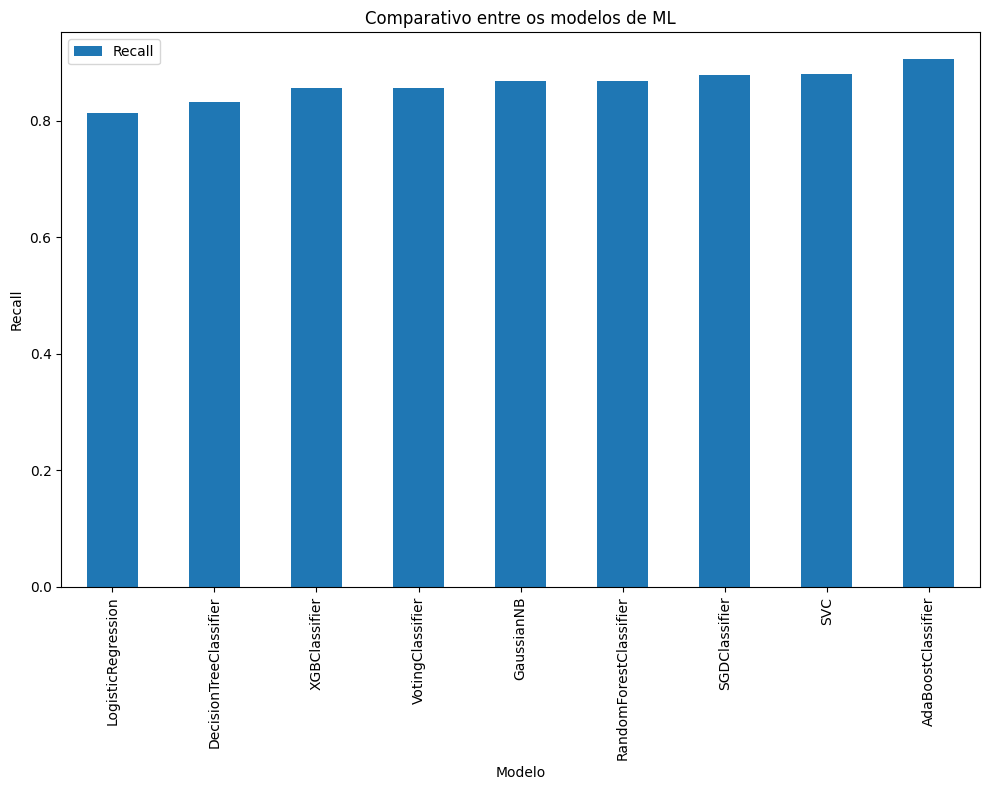

In [ ]:
#plotando o gráfico de entrada de passageiros por estação de metrô
fig, ax = plt.subplots(figsize=(10,8))
dfResult.sort_values(by=['Recall']).plot(kind="bar", y="Recall", ax=ax)
ax.set_title("Comparativo entre os modelos de ML")
ax.set_xlabel("Modelo")
ax.set_ylabel("Recall")

plt.tight_layout()


## 7. Testando o melhor modelo nos dados de validação iniciais
No começo do notebook foi feita uma divisão nos dados separando 15% deles para a validação final. O modelo escolhido foi o `AdaBoost`, por ter tido o melhor desempenho

In [ ]:
# Criando o modelo de ML
model = AdaBoostClassifier(learning_rate=0.001, n_estimators= 10)

#treinando o modelo
model.fit(X_smt, y_smt)

## Preparndo os dados de teste
X = test.drop("remainder__Churn",axis=1)
y= test["remainder__Churn"]

y_pred = model.predict(X)

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9207    0.5727    0.7062       791
         1.0     0.4007    0.8528    0.5452       265

    accuracy                         0.6430      1056
   macro avg     0.6607    0.7128    0.6257      1056
weighted avg     0.7902    0.6430    0.6658      1056

Acurácia	Precisão	Recall	F1-score	AUC
0.6430		0.4007		0.8528	0.5452		0.7128

Total de registros positivos: 265
Total de registros negativos: 791



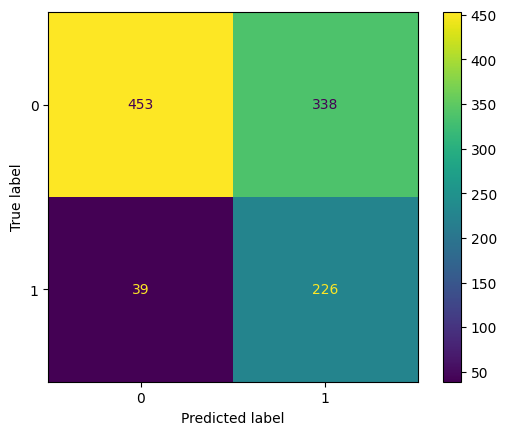

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# plotar a matrix de confusão
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Analisando o desempenho do modelo
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y, y_pred, digits=4))


precision,recall, f1, support = precision_recall_fscore_support(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc=roc_auc_score(y, y_pred)

#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))


As métricas de desempenho pioram sensivelmente ao executa o modelo com dados de teste, nunca vistos anteriormente. Ainda assim, o `AdaBoost` foi capaz de identificar mais 85% dos cancelamentos.

## 8. Conclusões

Vários testes foram realizados, com ajustes de hiperparâmetros e no geral não há grandes diferenças entre os métodos testados. O `AdaBoostClassifier` se saiu melhor, seguido de perto pelo modelo de Máquina de Vetor de Suporte e do Gradiente Descendente.
Nota-se também que há uma queda do desempenho dos modelos de ML no processo de validação, quando se faz predições em dados não vistos anteriormente e não balanceados, ainda assim, o modelo `AdaBoost` se saiu bem com índice de acertos de 85%. Porém a precisão cai significativamente, indicando que o modelo incorre em muitos falsos positivos. Serão necessárias técnicas mais avançadas de *machine learning* para melhorar a precisão.